In [89]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as skm
from sklearn.tree import export_graphviz


## import dataset + preprocess

In [90]:
df = pd.read_csv("S1Data.csv")
## from article of data set, Event = death event

In [91]:
df.dropna(inplace = True)
df.drop_duplicates(inplace = True)

In [92]:
df.head()
#df.info()

,TIME,Event,Gender,Smoking,Diabetes,BP,Anaemia,Age,Ejection.Fraction,Sodium,Creatinine,Pletelets,CPK
0,97,0,0,0,0,0,1,43.0,50,135,1.30,237000.00,358
1,180,0,1,1,1,0,1,73.0,30,142,1.18,160000.00,231
2,31,1,1,1,0,1,0,70.0,20,134,1.83,263358.03,582
3,87,0,1,0,0,0,1,65.0,25,141,1.10,298000.00,305
4,113,0,1,0,0,0,0,64.0,60,137,1.00,242000.00,1610


In [99]:
# normalize all variables besides event
continuous_cols = ['TIME', 'Age', 'Ejection.Fraction', 'Sodium', 'Creatinine', 'Pletelets', 'CPK']
df[continuous_cols] = (df[continuous_cols] - df[continuous_cols].mean())/df[continuous_cols].std()

<Axes: >

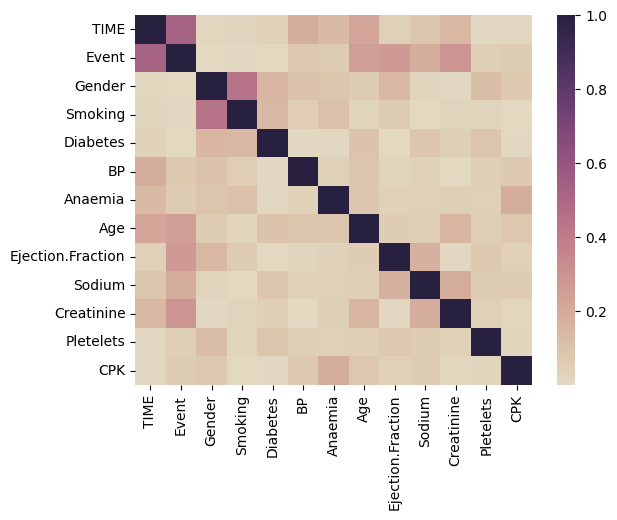

In [100]:
# make heatmap
corr = abs(df.corr())
sns.heatmap(corr, cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))

In [101]:
df.head()

,TIME,Event,Gender,Smoking,Diabetes,BP,Anaemia,Age,Ejection.Fraction,Sodium,Creatinine,Pletelets,CPK
0,-0.428541,0,0,0,0,0,1,-1.499300,1.006890,-0.368369,-0.090748,-2.694978e-01,-0.230694
1,0.640851,0,1,1,1,0,1,1.022808,-0.683035,1.218042,-0.206745,-1.056785e+00,-0.361583
2,-1.278901,1,1,1,0,1,0,0.770597,-1.527998,-0.594999,0.421572,7.523048e-09,0.000165
3,-0.557383,0,1,0,0,0,1,0.350246,-1.105517,0.991412,-0.284076,3.541970e-01,-0.285317
4,-0.222393,0,1,0,0,0,0,0.266176,1.851853,0.084892,-0.380740,-2.183753e-01,1.059645


## model

In [102]:
X = df.drop(labels = ['Event'], axis = 1)
y = df['Event']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 82)

In [109]:
## Random Forest Classification
NUM_TREES = 100
MAX_DEPTH = 20

model = RandomForestClassifier(n_estimators = NUM_TREES, max_depth = MAX_DEPTH, criterion='entropy', random_state = 82)

In [107]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

## Evaluation

In [54]:
def evaluate(y_pred, y_test):
    print("Accuracy: " + str(skm.accuracy_score(y_test, y_pred)))
    print("Precision: " + str(skm.precision_score(y_test, y_pred)))
    print("Recall: "+ str(skm.recall_score(y_test, y_pred)))
    print("F1: " + str(skm.f1_score(y_test, y_pred)))
    print("Confusion Matrix: " + str(skm.confusion_matrix(y_test, y_pred)))

In [110]:
evaluate(y_pred, y_test)

Accuracy: 0.9333333333333333
Precision: 0.9444444444444444
Recall: 0.85
F1: 0.8947368421052632
Confusion Matrix: [[39  1]
 [ 3 17]]


In [63]:
model.decision_path(X)

(<299x3498 sparse matrix of type '<class 'numpy.int64'>'
 	with 104287 stored elements in Compressed Sparse Row format>,
 array([   0,   77,  154,  231,  290,  351,  418,  503,  570,  655,  720,
         779,  838,  899,  982, 1055, 1118, 1185, 1252, 1325, 1422, 1497,
        1578, 1643, 1698, 1761, 1824, 1887, 1958, 2045, 2116, 2181, 2238,
        2317, 2406, 2471, 2544, 2603, 2654, 2723, 2794, 2855, 2932, 2995,
        3054, 3143, 3214, 3285, 3368, 3429, 3498]))